/Users/zhengyumin/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/var/folders/g3/y571_81n6471lhm2760kc1mh0000gn/T/ipykernel_9540/1740364324.py:33: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  new_dataset1.obs['cell_annotation'] = new_dataset1.obs['cell_annotation'].map(rename_map)
/Users/zhengyumin/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


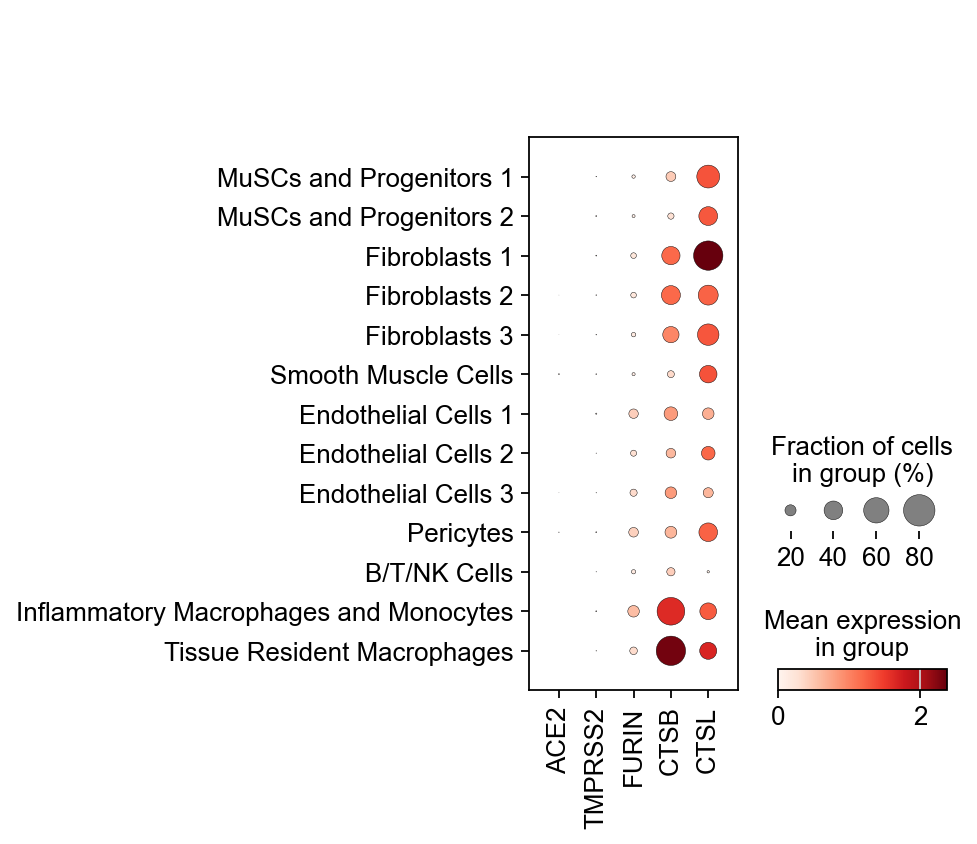

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
sc.set_figure_params(dpi_save=300)
dataset1 = sc.read('DeMicheli/DeMicheli_data.h5ad')
obs = pd.read_csv('DeMicheli/DeMicheli_meta.tsv',sep='\t',index_col=0)
dataset1.obs = obs
# dataset1_umap = pd.read_csv('/Users/zhengyumin/Downloads/collaboration/basil/dec9/dataset1/Scanpy_UMAP.coords.tsv',sep='\t',header=None,index_col=0)
dataset1.obs['cell_annotation'] = dataset1.obs['cell_annotation'].astype('category')
# dataset1.obsm['X_umap'] = dataset1_umap.values

# sc.pl.umap(dataset1,color = 'cell_annotation')
ordered_celltypes = ['MuSCs and progenitors 1','MuSCs and progenitors 2','Fibroblasts 1','Fibroblasts 2','Fibroblasts 3','Smooth muscle cells','Endothelial 1','Endothelial 2','Endothelial 3','Pericytes','B/T/NK cells','Inflammatory macrophages and monocytes','Tissue-resident macrophages'] 
rename_map = {
    'MuSCs and progenitors 1': 'MuSCs and Progenitors 1',
    'MuSCs and progenitors 2': 'MuSCs and Progenitors 2',
    'Fibroblasts 1': 'Fibroblasts 1',
    'Fibroblasts 2': 'Fibroblasts 2',
    'Fibroblasts 3': 'Fibroblasts 3',
    'Smooth muscle cells':'Smooth Muscle Cells',
    'Endothelial 1':'Endothelial Cells 1',
    'Endothelial 2':'Endothelial Cells 2',
    'Endothelial 3':'Endothelial Cells 3',
    'Pericytes':'Pericytes',
    'B/T/NK cells':'B/T/NK Cells',
    'Inflammatory macrophages and monocytes':'Inflammatory Macrophages and Monocytes',
    'Tissue-resident macrophages':'Tissue Resident Macrophages'
    # Add more mappings as needed
}

new_dataset1 = dataset1[dataset1.obs['cell_annotation'].isin(ordered_celltypes)]

new_dataset1.obs['cell_annotation'] = new_dataset1.obs['cell_annotation'].map(rename_map)
new_dataset1.obs['cell_annotation'] = new_dataset1.obs['cell_annotation'].cat.reorder_categories(list(rename_map.values()))
sc.pl.dotplot(new_dataset1, ['ACE2', 'TMPRSS2', 'FURIN', 'CTSB', 'CTSL'], 'cell_annotation', vcenter=0.5)

/var/folders/g3/y571_81n6471lhm2760kc1mh0000gn/T/ipykernel_9540/912021155.py:13: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  dataset2 = sc.AnnData(X=np.hstack([dataset2.X, new_genes_data]),
/Users/zhengyumin/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)
/Users/zhengyumin/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


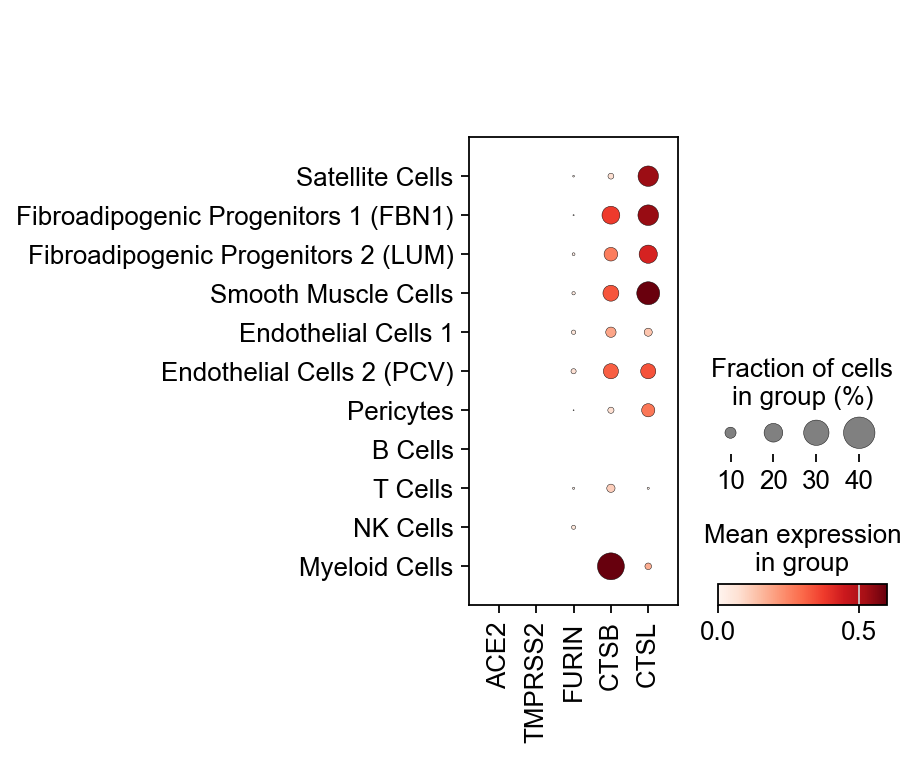

In [2]:
dataset2 = sc.read('Sealfon/Sealfon_data_meta.h5ad')#dataset 2 Sealfon

# Number of cells in the dataset
n_cells = dataset2.shape[0]

# Creating a zero-filled matrix for the new genes
new_genes_data = np.zeros((n_cells, 2))

# Creating a DataFrame for the new gene names
new_genes = pd.DataFrame(index=['ACE2', 'TMPRSS2'])

# Concatenate the new genes to the AnnData object
dataset2 = sc.AnnData(X=np.hstack([dataset2.X, new_genes_data]), 
                   obs=dataset2.obs, 
                   var=pd.concat([dataset2.var, new_genes]))
dataset2_obs = pd.read_csv('/Users/zhengyumin/Downloads/collaboration/basil/dec9/dataset2/Human Muscle Single Cell Celltype Labeling.csv')
dataset2_obs['Cell ID'] = dataset2_obs['Cell ID'].astype(str)
dataset2_obs['index'] = dataset2_obs['Cell ID']#dataset2_obs['Cell ID']+'-'+dataset2_obs['Cell ID'].str.split('_').str[0]
dataset2.obs.reset_index(inplace=True)
dataset2.obs['index'] = dataset2.obs['index'].astype(str)
dataset2.obs['index'] = dataset2.obs['index'].str.split('-').str[0]
dataset2.obs = pd.merge(dataset2.obs,dataset2_obs, how='inner',on=['index'])
dataset2.obs = dataset2.obs.set_index('index')
rename_map = {
    'FBN1+ FAP Cells': 'Fibroadipogenic Progenitors 1 (FBN1)',
    'LUM+ FAP Cells': 'Fibroadipogenic Progenitors 2 (LUM)',
    'Endothelial Cells': 'Endothelial Cells 1',
    'PCV Endothelial Cells': 'Endothelial Cells 2 (PCV)',
    'Satellite Cells':'Satellite Cells',
    'Smooth Muscle Cells':'Smooth Muscle Cells',
    'Pericytes':'Pericytes',
    'B Cells':'B Cells',
    'T Cells':'T Cells',
    'NK Cells':'NK Cells',
    'Myeloid Cells':'Myeloid Cells'
    # Add more mappings as needed
}
dataset2.obs['Cell Type'] = dataset2.obs['Cell Type'].map(rename_map)
dataset2.obs['Cell Type'] = dataset2.obs['Cell Type'].astype('category')
ordered_celltypes = ['Satellite Cells','Fibroadipogenic Progenitors 1 (FBN1)','Fibroadipogenic Progenitors 2 (LUM)','Smooth Muscle Cells','Endothelial Cells 1','Endothelial Cells 2 (PCV)','Pericytes','B Cells','T Cells','NK Cells','Myeloid Cells'] 
dataset2.obs['Cell Type'] = dataset2.obs['Cell Type'].cat.reorder_categories(ordered_celltypes)
sc.pl.dotplot(dataset2, ['ACE2','TMPRSS2','FURIN', 'CTSB', 'CTSL'], 'Cell Type',vmax=0.6)


In [ ]:
conda